### Data Perspectives

```mermaid
flowchart TB

A[Data] --> N[Numeric]
A --> C[Categorical]

N --> C2[Continuous]
N --> C3["Count / DIscrete"]

C --> L[Levels]
C --> O[Order]

L --> Binary
L --> NB["Non Binary"]

O --> Ordinal
O --> Nominal
```

In [2]:
require(tidyverse)
require(gtsummary)

### EDA (Exploratory Data Analysis)

```mermaid
flowchart TB

EDA --> Sumaries 
EDA --> Visualizations
EDA --> H["Hypothesis Testing"]

```

In [3]:
nhanes <- read_csv("data/nhanes.csv") 

Rows: 20293 Columns: 78
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (29): SurveyYr, Gender, Race1, Race3, Education, MaritalStatus, HHIncome, HomeOwn, Work, BMICatUnder20yrs, BMI_W...
dbl (49): ID, Age, AgeMonths, HHIncomeMid, Poverty, HomeRooms, Weight, Length, HeadCirc, Height, BMI, Pulse, BPSysAv...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
nhanes

# A tibble: 20,293 × 78
      ID SurveyYr Gender   Age AgeMonths Race1    Race3 Education   MaritalStatus HHIncome HHIncomeMid Poverty HomeRooms
   <dbl> <chr>    <chr>  <dbl>     <dbl> <chr>    <chr> <chr>       <chr>         <chr>          <dbl>   <dbl>     <dbl>
 1 51624 2009_10  male      34       409 White    NA    High School Married       25000-3…       30000    1.36         6
 2 51625 2009_10  male       4        49 Other    NA    NA          NA            20000-2…       22500    1.07         9
 3 51626 2009_10  male      16       202 Black    NA    NA          NA            45000-5…       50000    2.27         5
 4 51627 2009_10  male      10       131 Black    NA    NA          NA            20000-2…       22500    0.81         6
 5 51628 2009_10  female    60       722 Black    NA    High School Widowed       10000-1…       12500    0.69         6
 6 51629 2009_10  male      26       313 Mexican  NA    9 - 11th G… Married       25000-3…       30000    1.01         4
 7 51630

In [5]:
round(prop.table(table(with(nhanes, Race1))), 2)


   Black Hispanic  Mexican    Other    White 
    0.23     0.11     0.18     0.11     0.36 

In [6]:
gender_var = with(nhanes, Gender)

In [7]:
gender_freq = table(gender_var)

In [8]:
gender_prop = prop.table(gender_freq)

In [9]:
round(gender_prop, 2)

gender_var
female   male 
   0.5    0.5 

In [10]:
nhanes |> with(Gender) |> table() |> prop.table() |> round(2) -> res

In [11]:
res


female   male 
   0.5    0.5 

### Summaries

In [12]:
nhanes |> with(Age) |> fivenum()

[1]  0 10 28 53 80

In [13]:
nhanes |> with(Age) |> min()

[1] 0

In [14]:
nhanes |> with(Age) |> max()

[1] 80

In [15]:
nhanes |> with(Age) |> median()

[1] 28

In [16]:
nhanes |> with(Age) |> quantile(0.25)

25% 
 10 

In [17]:
nhanes |> with(Age) |> quantile(0.75)

75% 
 53 

In [18]:
nhanes |> with(Age) |> mean()

[1] 32.02434

In [19]:
nhanes |> with(Age) |> sd()

[1] 24.75754

In [20]:
nhanes |> with(Age) |> IQR()

[1] 43

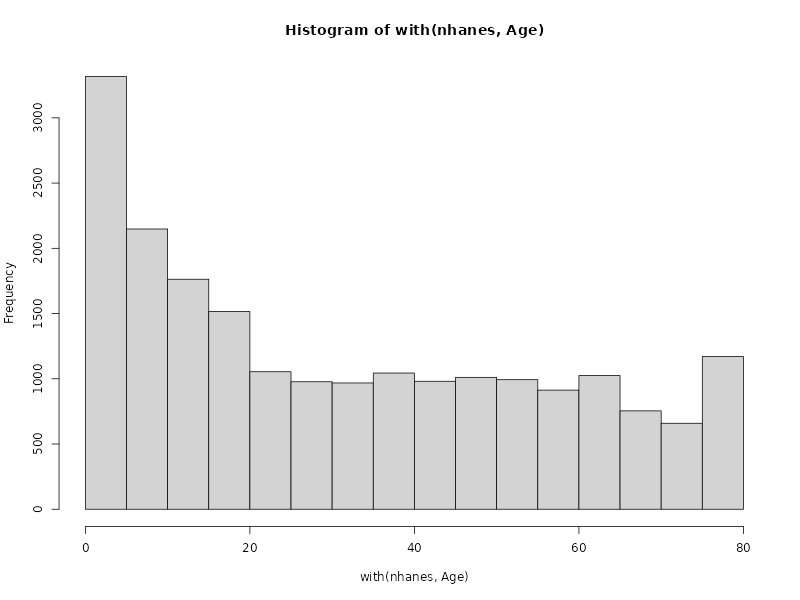

In [21]:
nhanes |> with(Age) |> hist()

In [22]:
continuous = rnorm(1000, mean = 50, sd = 10) 

In [23]:
continuous |> mean()

[1] 49.99403

In [24]:
continuous |> median()

[1] 49.78556

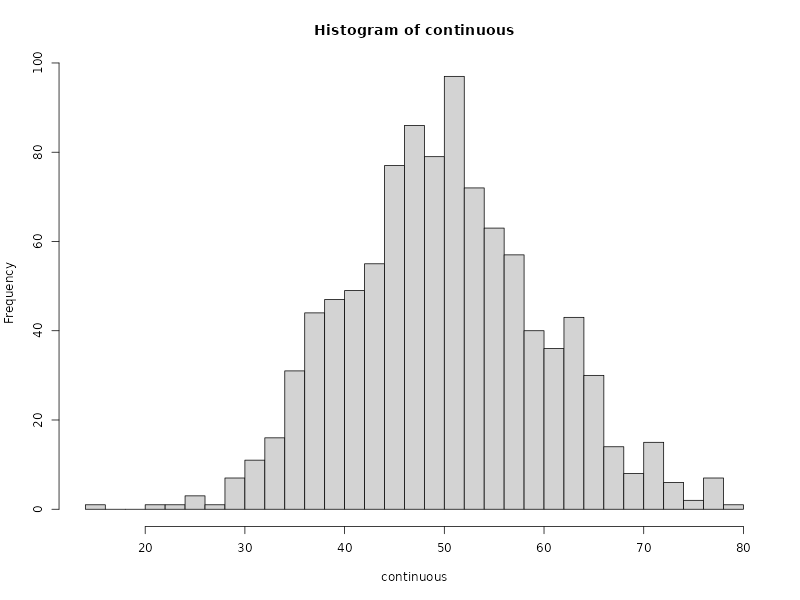

In [25]:
continuous |> hist(breaks = 40)

In [26]:
#Frequency
nhanes |> with(Race1) |> table()


   Black Hispanic  Mexican    Other    White 
    4640     2209     3739     2312     7393 

In [27]:
#Proportion
nhanes |> with(Race1) |> table() |> prop.table() |> round(2)


   Black Hispanic  Mexican    Other    White 
    0.23     0.11     0.18     0.11     0.36 

In [28]:
#Percentage
(nhanes |> with(Race1) |> table() |> prop.table() * 100) |> round(1)


   Black Hispanic  Mexican    Other    White 
    22.9     10.9     18.4     11.4     36.4 

### Visualizaton

In [29]:
nhanes |> with(Age) |> fivenum()

[1]  0 10 28 53 80

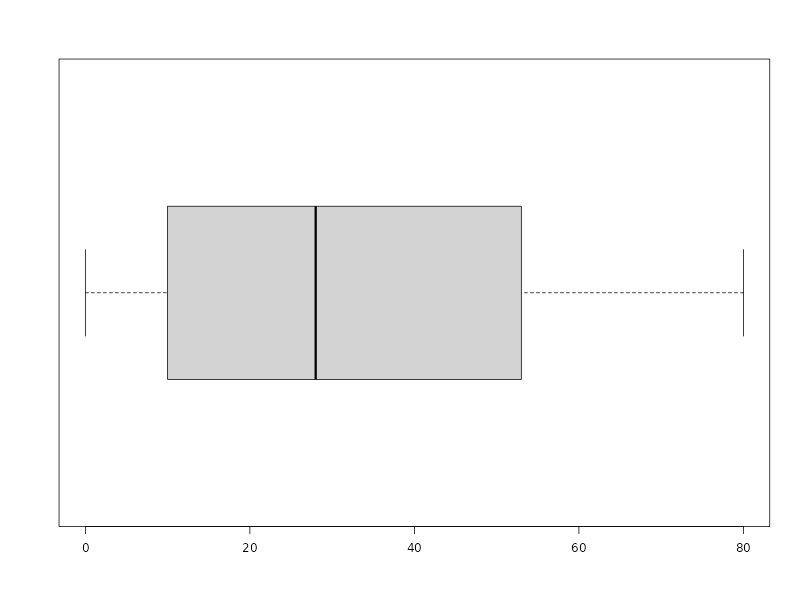

In [30]:
nhanes |> with(Age) |> boxplot(horizontal = TRUE)

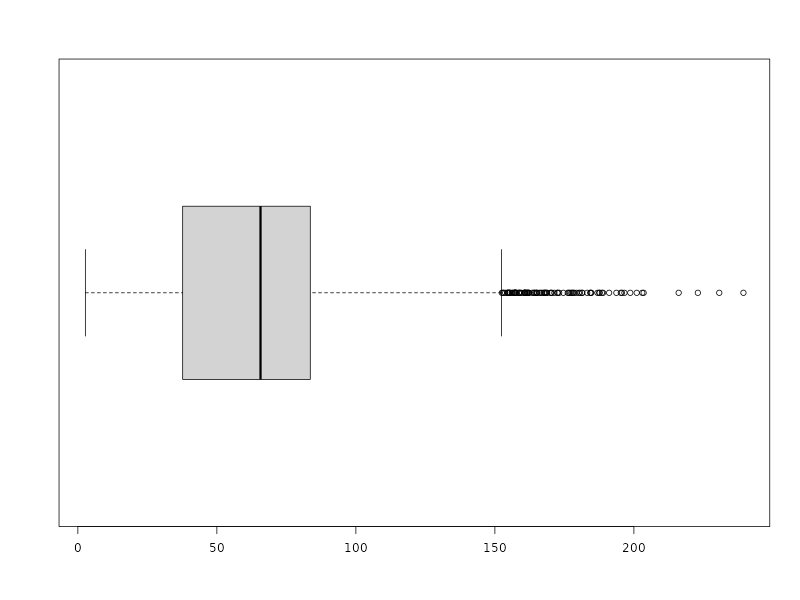

In [31]:
nhanes |> with(Weight) |> boxplot(horizontal = TRUE)

In [32]:
nhanes |> with(Race1) |> table()


   Black Hispanic  Mexican    Other    White 
    4640     2209     3739     2312     7393 

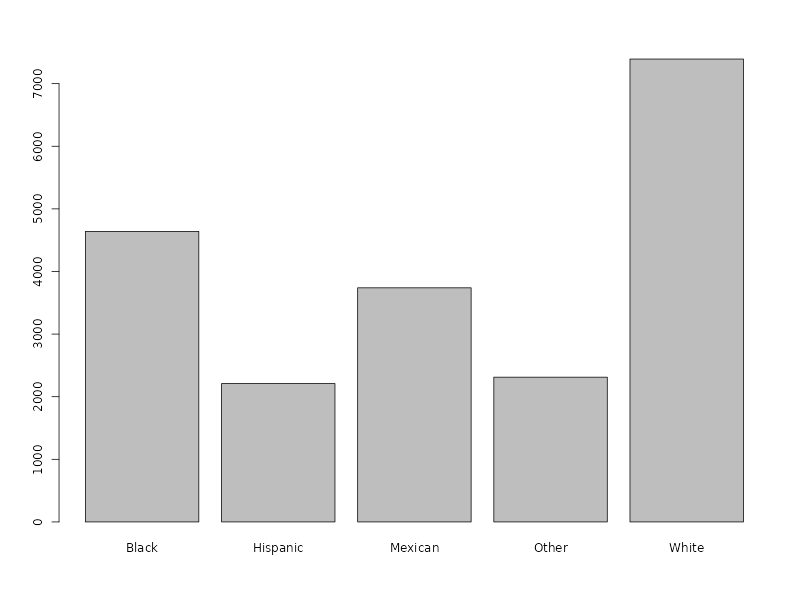

In [33]:
nhanes |> with(Race1) |> table() |> barplot()

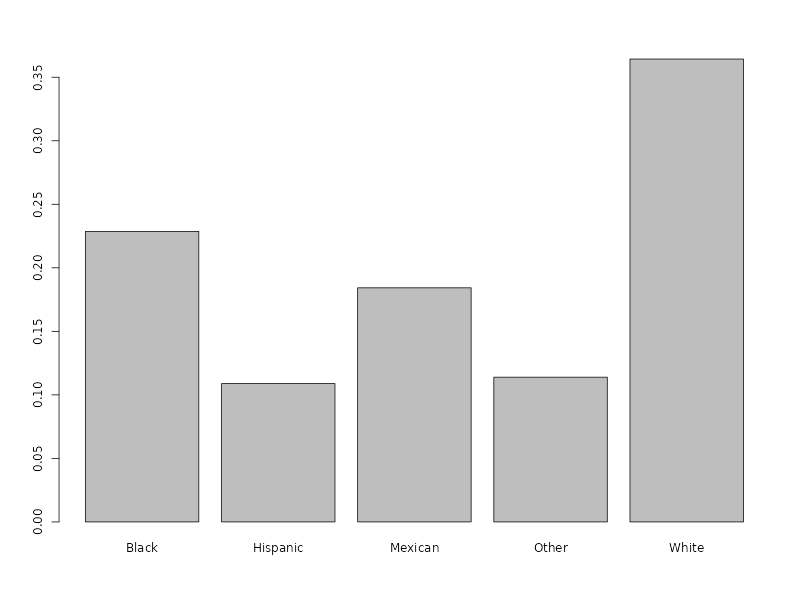

In [34]:
nhanes |> with(Race1) |> table() |> prop.table() |> barplot()

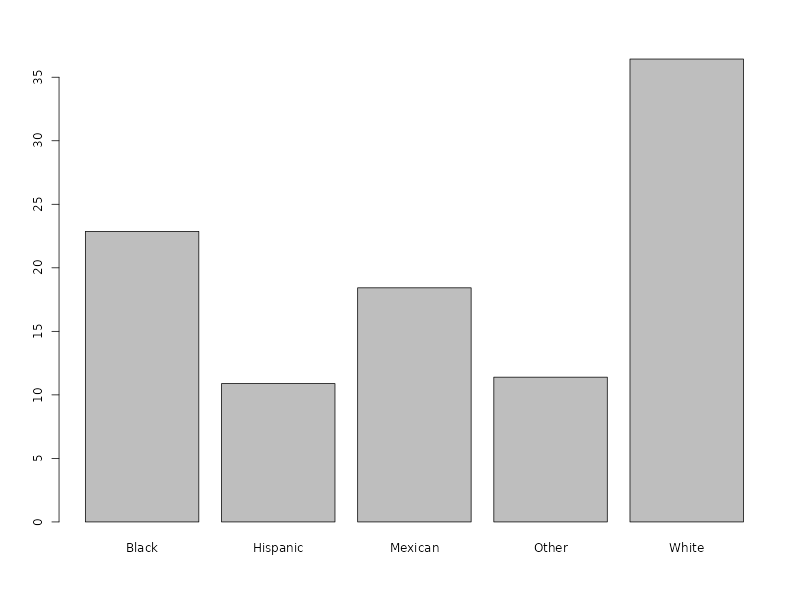

In [35]:
(nhanes |> with(Race1) |> table() |> prop.table() * 100) |> barplot()

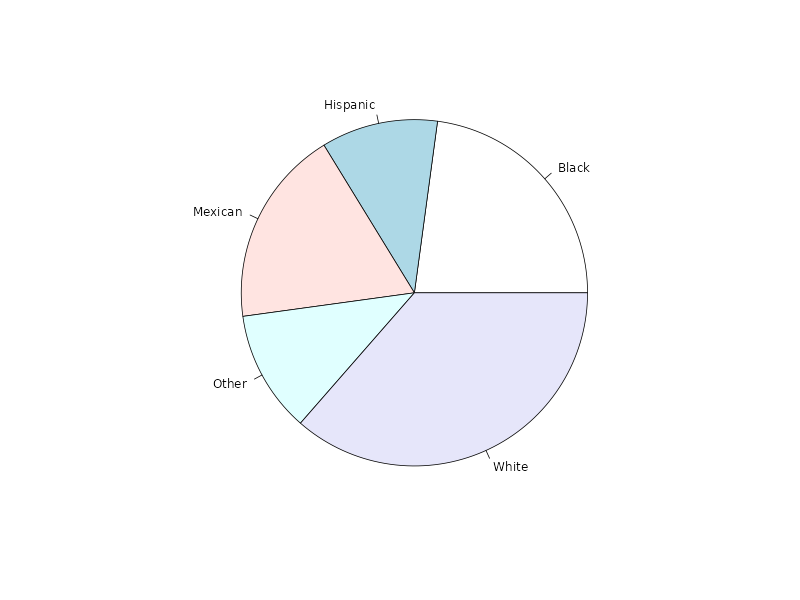

In [36]:
nhanes |> with(Race1) |> table() |> prop.table() |> pie()

In [37]:
nhanes |> ncol()

[1] 78

In [38]:
nhanes |> nrow()

[1] 20293

In [39]:
nhanes |> glimpse()

Rows: 20,293
Columns: 78
$ ID               <dbl> 51624, 51625, 51626, 51627, 51628, 51629, 51630, 51631, 51632, 51633, 51634, 51635, 51636, 51…
$ SurveyYr         <chr> "2009_10", "2009_10", "2009_10", "2009_10", "2009_10", "2009_10", "2009_10", "2009_10", "2009…
$ Gender           <chr> "male", "male", "male", "male", "female", "male", "female", "female", "male", "male", "male",…
$ Age              <dbl> 34, 4, 16, 10, 60, 26, 49, 1, 10, 80, 10, 80, 4, 35, 9, 4, 17, 13, 7, 42, 0, 66, 8, 45, 28, 8…
$ AgeMonths        <dbl> 409, 49, 202, 131, 722, 313, 596, 12, 124, NA, 121, NA, 48, 431, 115, 58, 208, 156, 85, 514, …
$ Race1            <chr> "White", "Other", "Black", "Black", "Black", "Mexican", "White", "White", "Hispanic", "White"…
$ Race3            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ Education        <chr> "High School", NA, NA, NA, "High School", "9 - 11th Grade", "Some College", NA, NA, "Some Col…
$ MaritalStatus

### Bivariate analysis

In [40]:
# Numeric vs Numeric

In [41]:
#Summary ->Correlation
cor(nhanes$Height, nhanes$Age, use="complete.obs")

[1] 0.5455932

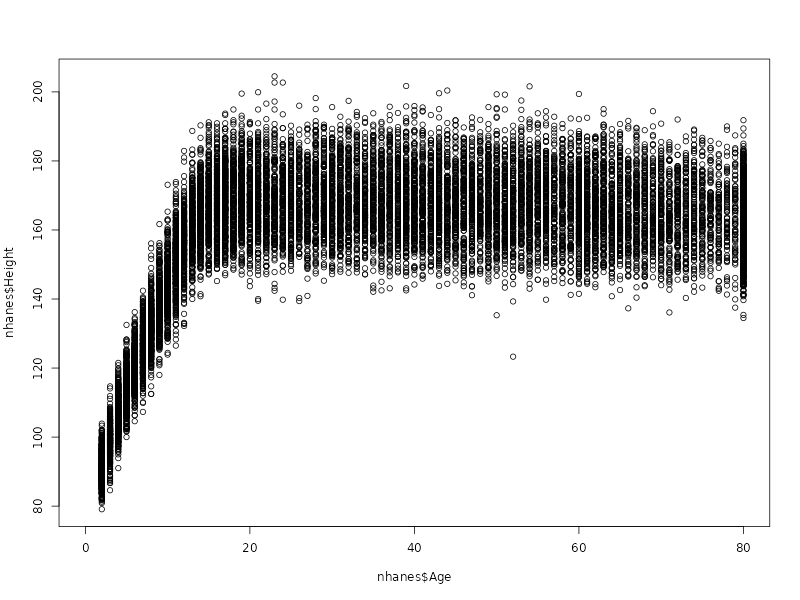

In [42]:
#Visualization -> Scatter plot
plot(nhanes$Age, nhanes$Height)

In [43]:
# Categorical vs Categorical

In [44]:
table(nhanes$Gender, nhanes$Diabetes)

        
           No  Yes
  female 8940  845
  male   8814  861

In [45]:
#Joint probabilities
table(nhanes$Gender, nhanes$Diabetes) |> prop.table() |> round(3) * 100

        
           No  Yes
  female 45.9  4.3
  male   45.3  4.4

In [46]:
#Conditional Probabilities
table(nhanes$Gender, nhanes$Diabetes) |> prop.table(1) |> round(3) * 100

        
           No  Yes
  female 91.4  8.6
  male   91.1  8.9

In [47]:
#Conditional Probabilities
table(nhanes$Gender, nhanes$Diabetes) |> prop.table(2) |> round(3) * 100

        
           No  Yes
  female 50.4 49.5
  male   49.6 50.5

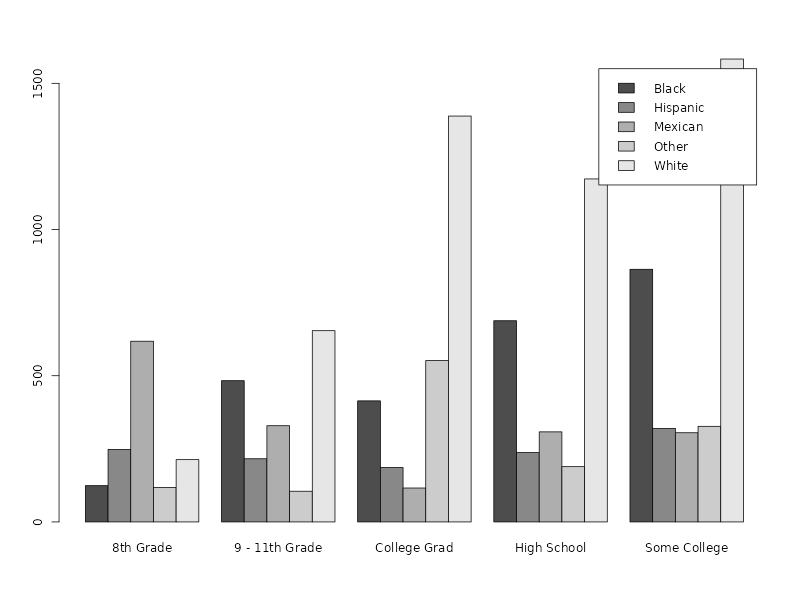

In [48]:
#Grouped bar charts
table(nhanes$Race1, nhanes$Education) |> barplot(beside=TRUE, legend=TRUE)

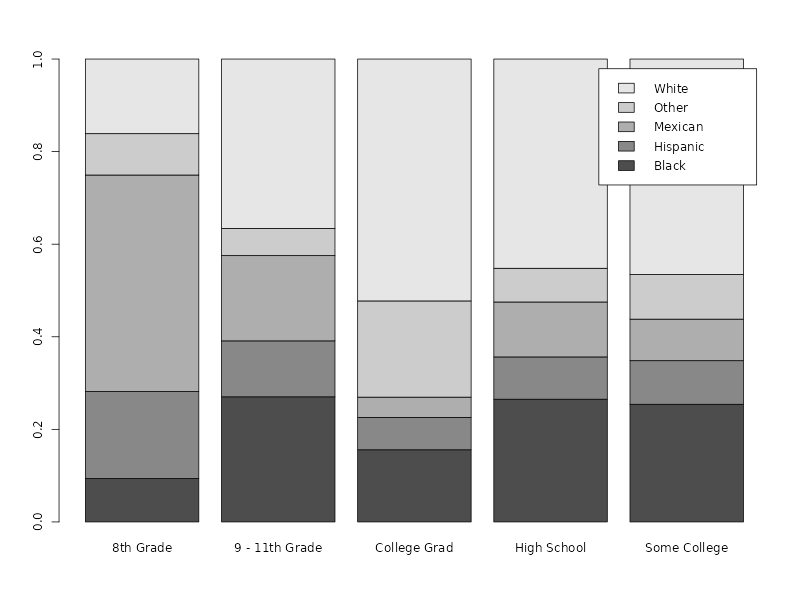

In [49]:
table(nhanes$Race1, nhanes$Education) |> prop.table(2) |> barplot(legend=TRUE)

In [50]:
# Numeric vs Categorical

In [51]:
# numeric summaries at each level of the categorical variable

nhanes |> filter(Gender == 'male') |> with(Height) |> fivenum()

[1]  80.9 154.1 170.3 177.2 204.5

In [52]:
nhanes |> filter(Gender == 'female') |> with(Height) |> fivenum()

[1]  79.1 149.0 157.8 163.9 190.8

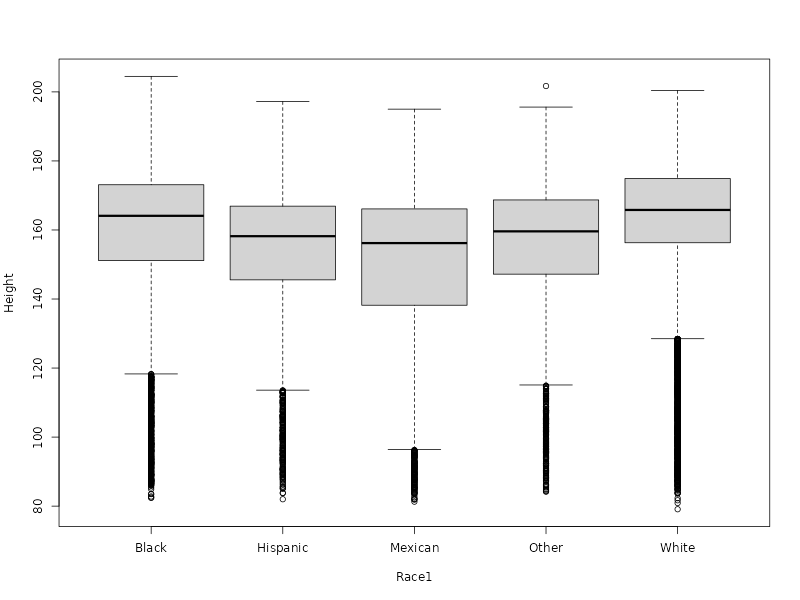

In [53]:
boxplot(Height ~ Race1, nhanes)

In [54]:
#install.packages("gtsummary")

In [55]:
c(1, 7, 12)

[1]  1  7 12

### Using GTSummary


In [60]:
nhanes |> 
    tbl_summary(
        include = c(Age, Gender, Race1, Education, Diabetes, Height)
    )

Characteristic,"N = 20,2931"
Age,"28 (10, 53)"
Gender,
female,"10,212 (50%)"
male,"10,081 (50%)"
Race1,
Black,"4,640 (23%)"
Hispanic,"2,209 (11%)"
Mexican,"3,739 (18%)"
Other,"2,312 (11%)"
White,"7,393 (36%)"


In [61]:
nhanes |> 
    tbl_summary(
        include = c(Age, Gender, Race1, Education, Height), 
        by = Diabetes
    )

833 missing rows in the "Diabetes" column have been removed.


Characteristic,"No N = 17,7541","Yes N = 1,7061"
Age,"25 (10, 49)","62 (52, 72)"
Gender,,
female,"8,940 (50%)",845 (50%)
male,"8,814 (50%)",861 (50%)
Race1,,
Black,"3,980 (22%)",501 (29%)
Hispanic,"1,924 (11%)",181 (11%)
Mexican,"3,238 (18%)",264 (15%)
Other,"2,064 (12%)",171 (10%)
White,"6,548 (37%)",589 (35%)
